In [48]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler

from sklearn.naive_bayes import MultinomialNB

from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import GradientBoostingClassifier


from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

!pip install wordcloud
from wordcloud import WordCloud,STOPWORDS



import nltk

from nltk.tokenize import word_tokenize 









In [25]:
df=df=pd.read_csv("C:/Users/91984/Downloads/SMSSpamCollection.csv")
df

,Class,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [22]:
df.Class.value_counts()

ham     4825
spam     747
Name: Class, dtype: int64

In [26]:
df['spam'] = df['Class'].map( {'spam': 1, 'ham': 0} )
df.head(10)

,Class,sms,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
5,spam,FreeMsg Hey there darling it's been 3 week's n...,1
6,ham,Even my brother is not like to speak with me. ...,0
7,ham,As per your request 'Melle Melle (Oru Minnamin...,0
8,spam,WINNER!! As a valued network customer you have...,1
9,spam,Had your mobile 11 months or more? U R entitle...,1


In [28]:
df_ham  = df[df['spam'] == 0]
df_spam = df[df['spam'] == 1]


In [53]:
def show_wordcloud(data_spam_or_ham):
    text = ' '.join(data_spam_or_ham['sms'].astype(str).tolist())
    stopwords = set(STOPWORDS)
    
    fig_wordcloud = WordCloud(stopwords=stopwords,background_color='lightgrey',
                    colormap='viridis', width=800, height=600).generate(text)
    
    plt.figure(figsize=(10,7), frameon=True)
    plt.imshow(fig_wordcloud)  
    plt.axis('off')
    
    plt.show()

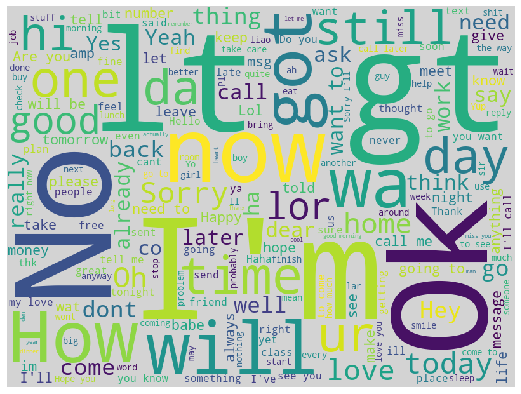

In [54]:
show_wordcloud(df_ham)


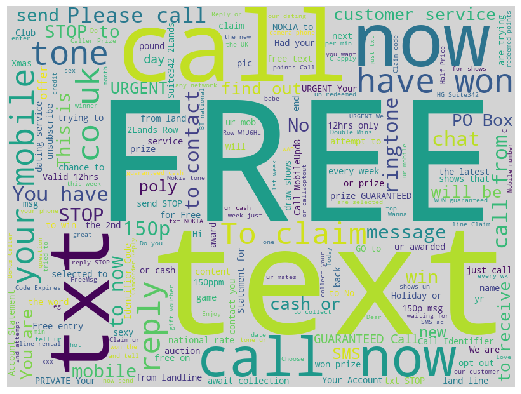

In [55]:
show_wordcloud(df_spam)

In [56]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [61]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91984\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [62]:

from nltk.corpus import stopwords
stopwords.words("english")[100:110]

['here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each']

In [63]:
def remove_punctuation_and_stopwords(sms):
    
    sms_no_punctuation = [ch for ch in sms if ch not in string.punctuation]
    sms_no_punctuation = "".join(sms_no_punctuation).split()
    
    sms_no_punctuation_no_stopwords = \
        [word.lower() for word in sms_no_punctuation if word.lower() not in stopwords.words("english")]
        
    return sms_no_punctuation_no_stopwords


In [65]:
df['sms'].apply(remove_punctuation_and_stopwords).head()


0    [go, jurong, point, crazy, available, bugis, n...
1                       [ok, lar, joking, wif, u, oni]
2    [free, entry, 2, wkly, comp, win, fa, cup, fin...
3        [u, dun, say, early, hor, u, c, already, say]
4    [nah, dont, think, goes, usf, lives, around, t...
Name: sms, dtype: object

In [78]:
x=df['sms']
y=df['spam']

In [75]:
from sklearn.model_selection import train_test_split

In [79]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 1)

In [80]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [119]:
vectorizer = TfidfVectorizer()


In [120]:
vectorizer.fit(X_train)
X_train_dtm=vectorizer.transform(X_train)
X_train_dtm

<3900x7155 sparse matrix of type '<class 'numpy.float64'>'
	with 51338 stored elements in Compressed Sparse Row format>

In [121]:
X_test_dtm=vectorizer.transform(X_test)
X_test_dtm


<1672x7155 sparse matrix of type '<class 'numpy.float64'>'
	with 21097 stored elements in Compressed Sparse Row format>

In [122]:
from sklearn.naive_bayes import MultinomialNB

In [123]:
nb=MultinomialNB()

In [124]:
nb.fit(X_train_dtm,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [125]:
ypred=nb.predict(X_test_dtm)
ypred_prob=nb.predict_proba(X_test_dtm)[:,1]

In [126]:
from sklearn.metrics import accuracy_score,roc_auc_score,classification_report

In [127]:
accuracy_score(y_test,ypred)

0.9575358851674641

In [129]:
roc_auc_score(y_test,ypred_prob)

0.9865404329735271

In [132]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1442
           1       1.00      0.69      0.82       230

    accuracy                           0.96      1672
   macro avg       0.98      0.85      0.90      1672
weighted avg       0.96      0.96      0.95      1672



In [101]:
vectorizer1 = TfidfVectorizer(analyzer = remove_punctuation_and_stopwords,ngram_range=(1,2),max_df=0.75,min_df=2)
vectorizer1.fit(X_train)

TfidfVectorizer(analyzer=<function remove_punctuation_and_stopwords at 0x000002103070B288>,
                binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=0.75, max_features=None,
                min_df=2, ngram_range=(1, 2), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [102]:
X_train_dtm=vectorizer1.transform(X_train)
X_train_dtm

<3900x3217 sparse matrix of type '<class 'numpy.float64'>'
	with 30228 stored elements in Compressed Sparse Row format>

In [103]:
X_test_dtm=vectorizer1.transform(X_test)
X_test_dtm

<1672x3217 sparse matrix of type '<class 'numpy.float64'>'
	with 12310 stored elements in Compressed Sparse Row format>

In [ ]:
nb.fit(X_train_dtm,y_train)


In [ ]:

ypred=nb.predict(X_test_dtm)
ypred_prob=nb.predict_proba(X_test_dtm)[:,1]

In [ ]:
accuracy_score(y_test,ypred)

In [ ]:
roc_auc_score(y_test,ypred_prob)

In [ ]:

print(classification_report(y_test,ypred))

In [66]:
from nltk import word_tokenize, sent_tokenize


In [69]:
 nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91984\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [70]:
print(sent_tokenize(df['sms'][0]))

['Go until jurong point, crazy..', 'Available only in bugis n great world la e buffet... Cine there got amore wat...']


In [72]:
print(word_tokenize(df['sms'][0]))


['Go', 'until', 'jurong', 'point', ',', 'crazy..', 'Available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', '...', 'Cine', 'there', 'got', 'amore', 'wat', '...']


In [74]:
stopWords = set(stopwords.words('english'))
words = word_tokenize(df['sms'][0])
wordsFiltered = []

for w in words:
    if w not in stopWords:
        wordsFiltered.append(w)

print(wordsFiltered)


['Go', 'jurong', 'point', ',', 'crazy..', 'Available', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', '...', 'Cine', 'got', 'amore', 'wat', '...']
